## **1. Data Loading & Description**

In [1]:
pip install scikit-learn


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imblearn in c:\users\mmush\appdata\local\programs\python\python312\lib\site-packages (0.0)




[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeCV
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector

c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
churn = pd.read_csv('churn_big_model2_202301_20240209_043846.csv', sep=';')
churn

C:\Users\mmush\AppData\Local\Temp\ipykernel_2676\1442114066.py:1: DtypeWarning: Columns (28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  churn = pd.read_csv('churn_big_model2_202301_20240209_043846.csv', sep=';')


,NPER,ID,LOS_GROUP,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,...,FREQ_TRX,JHARI_ADDON,FREQ_PSADDON,JHARI_PAY,FREQ_ONTIME,JHARI_GGN,FREQ_GGN,JHARI_USAGE,FREQ_USAGE,IS_CHURN
0,202301,250,M6,54.451.612.903,54.451.612.903,5,1,1,0,30720,...,0,305.0,0,8899.0,3,NaN,0,18.0,3,0
1,202301,568,M6,29.225.806.451,29.225.806.451,4,1,0,0,20480,...,0,563.0,0,8900.0,4,563.0,0,NaN,0,0
2,202301,851,M6,53.741.935.483,53.741.935.483,6,1,0,0,40960,...,0,1656.0,0,8909.0,5,1365.0,0,18.0,3,0
3,202301,1384,M6,47,47,2,1,0,0,30720,...,0,1004.0,0,8900.0,5,300.0,0,18.0,3,0
4,202301,1754,M6,33.967.741.935,33.967.741.935,5,1,0,0,30720,...,0,368.0,0,8896.0,0,210.0,0,18.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,202301,986819,M6,48.709.677.419,48.709.677.419,1,1,0,0,30720,...,0,907.0,0,8902.0,4,1197.0,0,18.0,3,0
1048571,202301,987327,M6,6.580.645.161,6.580.645.161,7,1,0,0,51200,...,0,219.0,0,8897.0,4,NaN,0,18.0,3,0
1048572,202301,987487,M6,10.903.225.806,10.903.225.806,5,1,1,0,30720,...,10,92.0,6,8902.0,5,NaN,0,2.0,3,0
1048573,202301,987901,M3,5.419.354.838,5.419.354.838,5,1,0,0,30720,...,4,184.0,0,8896.0,1,NaN,0,18.0,3,0


In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 68 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   NPER                1048575 non-null  int64  
 1   ID                  1048575 non-null  int64  
 2   LOS_GROUP           1004090 non-null  object 
 3   LOS_CUST_           1048575 non-null  object 
 4   JTAG                1048575 non-null  object 
 5   DIVRE_ID            1048575 non-null  int64  
 6   IS_FIBER            1048575 non-null  int64  
 7   TOTAL_MINIPACK      1048575 non-null  int64  
 8   TOTAL_STB_TAMBAHAN  1048575 non-null  int64  
 9   SPEED               1048575 non-null  int64  
 10  USAGE_INET          1048575 non-null  int64  
 11  USAGE_INET_FUP      1048575 non-null  int64  
 12  RATIO_USAGE         1048575 non-null  object 
 13  GR_USAGE            1048575 non-null  object 
 14  USAGE_USEETV        1048575 non-null  object 
 15  USAGE_POTS_OUT 

In [10]:
# # List of columns with string-formatted numbers
# string_cols = ['LOS_CUST_', 'JTAG', 'RATIO_USAGE', 'GR_USAGE', 'USAGE_USEETV']  # Replace with the actual column names

# # Function to remove dots as thousands separator and convert to float
# def convert_to_float(x):
#     # Remove dots used as thousand separators
#     x = x.replace('.', '')
#     # Replace comma decimal with period (if applicable) and convert to float
#     return float(x)

# # Apply the function to each column in the list
# for col in string_cols:
#     churn[col] = churn[col].apply(lambda x: convert_to_float(str(x)))

# # Check the result
# print(churn[string_cols].head())

In [11]:
# Identifikasi kolom bertipe object
object_cols = churn.select_dtypes(include='object').columns

# Fungsi untuk mengubah string numerik menjadi float
def convert_to_numeric(x):
    try:
        # Hapus pemisah ribuan ('.') dan ganti koma desimal (',') dengan titik ('.')
        x = x.replace('.', '').replace(',', '.')
        return float(x)
    except ValueError:
        # Jika tidak bisa dikonversi (bukan angka), kembalikan nilai aslinya
        return x

# Identifikasi kolom object yang isinya numerik
for col in object_cols:
    # Cek apakah seluruh data dalam kolom bisa dikonversi ke angka
    if churn[col].apply(lambda x: str(x).replace('.', '').replace(',', '').isdigit()).all():
        # Jika ya, terapkan fungsi untuk mengubah ke float
        churn[col] = churn[col].apply(lambda x: convert_to_numeric(str(x)))

In [12]:
# Daftar kolom object yang ingin diubah menjadi numerik, kecuali 'LOS_GROUP', 'PAYMENT_METHOD', 'KAT_HVC_NEW'
object_cols_to_convert = ['RATIO_USAGE', 'GR_USAGE', 'AVG_REDAMAN', 'FIBER_LENGTH',
                          'GR_BANKING', 'GR_ECOMMERCE', 'GR_GAMES', 'GR_ARPU']

# Fungsi untuk mengubah string numerik menjadi float
def convert_to_numeric(x):
    try:
        # Hapus pemisah ribuan ('.') dan ganti koma desimal (',') dengan titik ('.')
        x = x.replace('.', '').replace(',', '.')
        return float(x)
    except ValueError:
        # Jika tidak bisa dikonversi (bukan angka), kembalikan nilai aslinya
        return x

# Terapkan fungsi ke kolom-kolom yang diidentifikasi
for col in object_cols_to_convert:
    churn[col] = churn[col].apply(lambda x: convert_to_numeric(str(x)))

In [13]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 68 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   NPER                1048575 non-null  int64  
 1   ID                  1048575 non-null  int64  
 2   LOS_GROUP           1004090 non-null  object 
 3   LOS_CUST_           1048575 non-null  float64
 4   JTAG                1048575 non-null  float64
 5   DIVRE_ID            1048575 non-null  int64  
 6   IS_FIBER            1048575 non-null  int64  
 7   TOTAL_MINIPACK      1048575 non-null  int64  
 8   TOTAL_STB_TAMBAHAN  1048575 non-null  int64  
 9   SPEED               1048575 non-null  int64  
 10  USAGE_INET          1048575 non-null  int64  
 11  USAGE_INET_FUP      1048575 non-null  int64  
 12  RATIO_USAGE         1048575 non-null  float64
 13  GR_USAGE            1048575 non-null  float64
 14  USAGE_USEETV        1048575 non-null  float64
 15  USAGE_POTS_OUT 

## **2. Preprocessing Data**

### Pemeriksaan Missing Value

In [14]:
# # Periksa missing values
# for col in churn.columns:
#     print(f'{col} : {churn[col].isnull().sum()}')

# Hitung jumlah missing values per kolom
missing_values = churn.isnull().sum()

# Buat DataFrame untuk tampilan yang lebih rapi
missing_df = pd.DataFrame({'missing_count': missing_values})

# Urutkan berdasarkan jumlah missing values secara descending
missing_df = missing_df.sort_values('missing_count', ascending=False)

# # Atur opsi tampilan dan cetak
pd.set_option('display.max_rows', None)
print(missing_df)

                    missing_count
JHARI_GGN                  393798
JHARI_USAGE                 86002
JHARI_ADDON                 67366
LOS_GROUP                   44485
AVG_REDAMAN                 21644
FIBER_LENGTH                 8060
OPERATOR                     7811
RANGE_PAY_DAY                3468
JHARI_PAY                    3313
PAYMENT_METHOD               3184
KAT_HVC_NEW                   478
IS_VERIFIED                   478
GR_GAMES                        0
INDEX_COMP                      0
DEVICE_COMP                     0
TOTAL_HOMEWIFI                  0
VALID_HP                        0
GAMES_SEC                       0
GAMES_FREQ                      0
VALID_KTP                       0
NPER                            0
GR_ARPU                         0
VALID_EMAIL                     0
VALID_ALAMAT                    0
ECOMMERCE_SEC                   0
IS_RESELLER                     0
IS_ULDL                         0
IS_HSSP                         0
IS_HSSP_ULDL  

In [15]:
# Make a copy avoid changing the data
# new_churn = churn.select_dtypes(include=[np.number]).columns.copy()
# new_churn = churn[new_churn]
new_churn = churn.copy()

# Make new columns indicating what will be imputed
cols_with_missing = [col for col in new_churn.columns if new_churn[col].isnull().any()]
# for col in new_churn:
#   new_churn[col + '_was_missing'] = new_churn[col].isnull()

# Pisahkan kolom numerik dan non-numerik
numerical_columns = new_churn.select_dtypes(include=[np.number]).columns
non_numerical_columns = new_churn.select_dtypes(exclude=[np.number]).columns

# Hanya imputasi pada kolom numerik
iterative_imputer = IterativeImputer()
new_churn_numerical = pd.DataFrame(iterative_imputer.fit_transform(new_churn[numerical_columns]),
                                   columns=numerical_columns)

# Gabungkan kembali dengan kolom non-numerik
new_churn = pd.concat([new_churn_numerical, new_churn[non_numerical_columns]], axis=1)

print(new_churn.head())


       NPER      ID     LOS_CUST_          JTAG  DIVRE_ID  IS_FIBER  \
0  202301.0   250.0  5.445161e+10  5.445161e+10       5.0       1.0   
1  202301.0   568.0  2.922581e+10  2.922581e+10       4.0       1.0   
2  202301.0   851.0  5.374194e+10  5.374194e+10       6.0       1.0   
3  202301.0  1384.0  4.700000e+01  4.700000e+01       2.0       1.0   
4  202301.0  1754.0  3.396774e+10  3.396774e+10       5.0       1.0   

   TOTAL_MINIPACK  TOTAL_STB_TAMBAHAN    SPEED   USAGE_INET  ...  JHARI_PAY  \
0             1.0                 0.0  30720.0  287267038.0  ...     8899.0   
1             0.0                 0.0  20480.0   43884331.0  ...     8900.0   
2             0.0                 0.0  40960.0  344170514.0  ...     8909.0   
3             0.0                 0.0  30720.0  239919789.0  ...     8900.0   
4             0.0                 0.0  30720.0  272165384.0  ...     8896.0   

   FREQ_ONTIME    JHARI_GGN  FREQ_GGN  JHARI_USAGE  FREQ_USAGE  IS_CHURN  \
0          3.0   479.6

In [16]:
# Hitung jumlah missing values per kolom
missing_values = new_churn.isnull().sum()

# Buat DataFrame untuk tampilan yang lebih rapi
missing_df = pd.DataFrame({'missing_count': missing_values})

# Urutkan berdasarkan jumlah missing values secara descending
missing_df = missing_df.sort_values('missing_count', ascending=False)

# # Atur opsi tampilan dan cetak
pd.set_option('display.max_rows', None)
print(missing_df)

                    missing_count
LOS_GROUP                   44485
PAYMENT_METHOD               3184
KAT_HVC_NEW                   478
TOTAL_HOMEWIFI                  0
GR_ARPU                         0
VALID_ALAMAT                    0
IS_VERIFIED                     0
VALID_EMAIL                     0
VALID_HP                        0
VALID_KTP                       0
DEVICE_COMP                     0
IS_RESELLER                     0
INDEX_COMP                      0
GR_GAMES                        0
GAMES_SEC                       0
GAMES_FREQ                      0
GR_ECOMMERCE                    0
OPERATOR                        0
IS_ULDL                         0
ID                              0
IS_HSSP                         0
IS_HSSP_ULDL                    0
JHARI_TRX                       0
FREQ_TRX                        0
JHARI_ADDON                     0
FREQ_PSADDON                    0
JHARI_PAY                       0
FREQ_ONTIME                     0
JHARI_GGN     

In [17]:
# Daftar kolom non-numerik yang akan diimputasi
non_numeric_cols = ['LOS_GROUP', 'PAYMENT_METHOD', 'KAT_HVC_NEW']

# Inisialisasi SimpleImputer dengan strategi 'most_frequent' untuk menggantikan dengan mode
imputer = SimpleImputer(strategy='most_frequent')

# Aplikasikan SimpleImputer ke kolom-kolom non-numerik
new_churn[non_numeric_cols] = imputer.fit_transform(new_churn[non_numeric_cols])

# Periksa hasil imputasi
print(new_churn[non_numeric_cols].isnull().sum())

LOS_GROUP         0
PAYMENT_METHOD    0
KAT_HVC_NEW       0
dtype: int64


In [18]:
# Hitung jumlah missing values per kolom
missing_values = new_churn.isnull().sum()

# Buat DataFrame untuk tampilan yang lebih rapi
missing_df = pd.DataFrame({'missing_count': missing_values})

# Urutkan berdasarkan jumlah missing values secara descending
missing_df = missing_df.sort_values('missing_count', ascending=False)

# # Atur opsi tampilan dan cetak
pd.set_option('display.max_rows', None)
print(missing_df)

                    missing_count
NPER                            0
VALID_KTP                       0
OPERATOR                        0
GR_ARPU                         0
VALID_ALAMAT                    0
IS_VERIFIED                     0
VALID_EMAIL                     0
VALID_HP                        0
TOTAL_HOMEWIFI                  0
ID                              0
DEVICE_COMP                     0
INDEX_COMP                      0
GR_GAMES                        0
GAMES_SEC                       0
GAMES_FREQ                      0
GR_ECOMMERCE                    0
IS_RESELLER                     0
IS_ULDL                         0
IS_HSSP                         0
IS_HSSP_ULDL                    0
JHARI_TRX                       0
FREQ_TRX                        0
JHARI_ADDON                     0
FREQ_PSADDON                    0
JHARI_PAY                       0
FREQ_ONTIME                     0
JHARI_GGN                       0
FREQ_GGN                        0
JHARI_USAGE   

In [19]:
new_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 68 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   NPER                1048575 non-null  float64
 1   ID                  1048575 non-null  float64
 2   LOS_CUST_           1048575 non-null  float64
 3   JTAG                1048575 non-null  float64
 4   DIVRE_ID            1048575 non-null  float64
 5   IS_FIBER            1048575 non-null  float64
 6   TOTAL_MINIPACK      1048575 non-null  float64
 7   TOTAL_STB_TAMBAHAN  1048575 non-null  float64
 8   SPEED               1048575 non-null  float64
 9   USAGE_INET          1048575 non-null  float64
 10  USAGE_INET_FUP      1048575 non-null  float64
 11  RATIO_USAGE         1048575 non-null  float64
 12  GR_USAGE            1048575 non-null  float64
 13  USAGE_USEETV        1048575 non-null  float64
 14  USAGE_POTS_OUT      1048575 non-null  float64
 15  USAGE_POTS_IN  

In [20]:
# Hitung jumlah churn dan non-churn
new_churn['IS_CHURN'].value_counts()

IS_CHURN
0.0    978375
1.0     70200
Name: count, dtype: int64

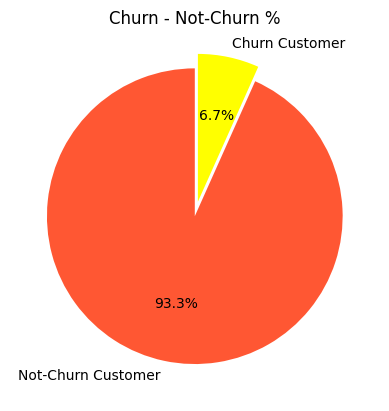

In [21]:
# Hitung jumlah churn dan non-churn
churn_counts = new_churn['IS_CHURN'].value_counts()

# Buat pie chart
plt.pie(churn_counts, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.1f%%', startangle=90, colors=['#FF5733', 'yellow'], explode=(0, 0.1))

# Tambahkan judul
plt.title('Churn - Not-Churn %')

# Tampilkan plot
plt.show()

### Duplikat

In [22]:
jumlah_baris_duplikat = new_churn.duplicated().sum()
print("Jumlah baris yang memiliki data sama: {} baris".format(jumlah_baris_duplikat))

Jumlah baris yang memiliki data sama: 0 baris


### Outlier
Menggunakan Z-score

In [23]:
# # Tentukan nilai threshold untuk Z-score
# threshold = 3

# # Menyimpan outlier untuk setiap kolom
# outliers = {}

# # Iterasi melalui setiap kolom numerik
# for col in churn.select_dtypes(include=[np.number]).columns:
#     churn_mean = churn[col].mean()
#     churn_std = churn[col].std()

#     # Menghitung Z-score dan menentukan outlier
#     col_outliers = churn[(churn[col] - churn_mean).abs() > threshold * churn_std][col]

#     # Jika ada outlier, tambahkan ke dictionary
#     if not col_outliers.empty:
#         outliers[col] = col_outliers.values

# # Menampilkan outlier untuk setiap kolom
# for col, outlier_values in outliers.items():
#     print(f'Outlier dari kolom {col} adalah {outlier_values}')

# # Tentukan nilai threshold untuk Z-score
# threshold = 3

# # Iterasi melalui setiap kolom numerik
# for col in new_churn.select_dtypes(include=[np.number]).columns:
#     churn_mean = new_churn[col].mean()
#     churn_std = new_churn[col].std()

#     # Menghitung Z-score
#     z_scores = (new_churn[col] - churn_mean) / churn_std

#     # Cek apakah ada outlier di kolom tersebut
#     has_outlier = np.any(np.abs(z_scores) > threshold)

#     # Menampilkan hasil dalam format True/False
#     print(f'{col} {has_outlier}')

In [24]:
def check_outlier(dataframe, variable, threshold=3):
    churn_mean = dataframe[variable].mean()
    churn_std = dataframe[variable].std()

    # Menghitung Z-score
    z_scores = (dataframe[variable] - churn_mean) / churn_std

    # Menentukan batas bawah dan atas berdasarkan Z-score
    low_limit = churn_mean - threshold * churn_std
    up_limit = churn_mean + threshold * churn_std

    if dataframe[(dataframe[variable] > up_limit) | (dataframe[variable] < low_limit)].any(axis=None):
        return True
    else:
        return False
    # # Cek apakah masih ada outlier
    # has_outlier = np.any(np.abs(z_scores) > threshold)
    # return has_outlier

In [25]:
# Misalnya num_cols adalah daftar nama kolom numerik yang ingin diperiksa
num_cols = new_churn.select_dtypes(include=[np.number]).drop('IS_CHURN', axis=1).columns

# Memeriksa apakah masih ada outlier
for col in num_cols:
    print(col, check_outlier(new_churn, col))  # Memeriksa apakah masih ada outlier

NPER False
ID False
LOS_CUST_ True
JTAG True
DIVRE_ID False
IS_FIBER True
TOTAL_MINIPACK True
TOTAL_STB_TAMBAHAN True
SPEED True
USAGE_INET True
USAGE_INET_FUP True
RATIO_USAGE True
GR_USAGE False
USAGE_USEETV True
USAGE_POTS_OUT True
USAGE_POTS_IN True
REV_ARPU True
FREQ_PAY10 True
FREQ_PAY15 True
FREQ_PAY20 False
FREQ_ISOLIR False
FREQ_PAYN1 True
FREQ_UNPAID True
RANGE_PAY_DAY True
TICKET_GGN True
MTTR True
TOTAL_GGN True
MOSTLY_NOONLINE True
MOSTLY_UNSPEC True
AVG_REDAMAN True
FIBER_LENGTH False
BANKING_FREQ True
BANKING_SEC True
GR_BANKING False
ECOMMERCE_FREQ True
ECOMMERCE_SEC True
GR_ECOMMERCE False
GAMES_FREQ True
GAMES_SEC True
GR_GAMES False
INDEX_COMP True
DEVICE_COMP True
TOTAL_HOMEWIFI True
VALID_KTP False
VALID_HP True
VALID_EMAIL False
IS_VERIFIED True
VALID_ALAMAT True
GR_ARPU True
OPERATOR True
IS_RESELLER True
IS_ULDL False
IS_HSSP True
IS_HSSP_ULDL False
JHARI_TRX True
FREQ_TRX True
JHARI_ADDON True
FREQ_PSADDON True
JHARI_PAY True
FREQ_ONTIME False
JHARI_GGN True
FR

In [26]:
def replace_with_thresholds(dataframe, variable, threshold=3):
    churn_mean = dataframe[variable].mean()
    churn_std = dataframe[variable].std()

    # Menghitung Z-score
    z_scores = (dataframe[variable] - churn_mean) / churn_std

    # Menentukan batas bawah dan atas berdasarkan Z-score
    low_limit = churn_mean - threshold * churn_std
    up_limit = churn_mean + threshold * churn_std

    # Replace nilai yang berada di luar batas tersebut
    dataframe.loc[z_scores > threshold, variable] = up_limit
    dataframe.loc[z_scores < -threshold, variable] = low_limit

    if dataframe[(dataframe[variable] > up_limit) | (dataframe[variable] < low_limit)].any(axis=None):
        return True
    else:
        return False
    # # Cek apakah masih ada outlier
    # has_outlier = np.any(np.abs(z_scores) > threshold)
    # return has_outlier

In [27]:
# Misalnya num_cols adalah daftar nama kolom numerik yang ingin diperiksa
num_cols = new_churn.select_dtypes(include=[np.number]).drop('IS_CHURN', axis=1).columns

# Mengganti outlier dan memeriksa apakah masih ada outlier
for col in num_cols:
    # replace_with_thresholds(new_churn, col)
    print(col, replace_with_thresholds(new_churn, col))  # Memeriksa apakah masih ada outlier

NPER False
ID False
LOS_CUST_ False
JTAG False
DIVRE_ID False
IS_FIBER False
TOTAL_MINIPACK False
TOTAL_STB_TAMBAHAN False
SPEED False
USAGE_INET False
USAGE_INET_FUP False
RATIO_USAGE False
GR_USAGE False
USAGE_USEETV False
USAGE_POTS_OUT False
USAGE_POTS_IN False
REV_ARPU False
FREQ_PAY10 False
FREQ_PAY15 False
FREQ_PAY20 False
FREQ_ISOLIR False
FREQ_PAYN1 False
FREQ_UNPAID False
RANGE_PAY_DAY False
TICKET_GGN False
MTTR False
TOTAL_GGN False
MOSTLY_NOONLINE False
MOSTLY_UNSPEC False
AVG_REDAMAN False
FIBER_LENGTH False
BANKING_FREQ False
BANKING_SEC False
GR_BANKING False
ECOMMERCE_FREQ False
ECOMMERCE_SEC False
GR_ECOMMERCE False
GAMES_FREQ False
GAMES_SEC False
GR_GAMES False
INDEX_COMP False
DEVICE_COMP False
TOTAL_HOMEWIFI False
VALID_KTP False
VALID_HP False
VALID_EMAIL False
IS_VERIFIED False
VALID_ALAMAT False
GR_ARPU False
OPERATOR False
IS_RESELLER False
IS_ULDL False
IS_HSSP False
IS_HSSP_ULDL False
JHARI_TRX False
FREQ_TRX False
JHARI_ADDON False
FREQ_PSADDON False
JHARI_

In [28]:
# churn_mean = churn['FREQ_UNPAID'].mean()
# churn_std = churn['FREQ_UNPAID'].std()
# print("Nilai rata-rata: {0}\nNilai Standard Deviasi: {1}".format(churn_mean, churn_std))

In [29]:
# # threshold value for z-score
# threshold = 3

In [30]:
# outlier = []

# for i in churn['FREQ_UNPAID']:
#     z = (i-churn_mean)/churn_std
#     if abs(z) > threshold:
#         outlier.append(i)

# print('Outlier dari kolom FREQ_UNPAID adalah', outlier)

In [31]:
# # Tentukan nilai threshold untuk Z-score
# threshold = 3

# # Iterasi melalui setiap kolom numerik
# for col in churn.select_dtypes(include=[np.number]).columns:
#     churn_mean = churn[col].mean()
#     churn_std = churn[col].std()

#     # Menghitung Z-score
#     z_scores = (churn[col] - churn_mean) / churn_std

#     # Replace nilai outlier dengan nilai threshold-nya
#     churn[col] = np.where(z_scores > threshold, churn_mean + threshold * churn_std,
#                           np.where(z_scores < -threshold, churn_mean - threshold * churn_std, churn[col]))

#     # Cek apakah masih ada outlier di kolom tersebut
#     has_outlier_after_replace = np.any(np.abs(z_scores_after_replace) > threshold)

#     # Menampilkan hasil dalam format True/False setelah replace
#     print(f'{col} {has_outlier_after_replace}')

In [32]:
# from scipy import stats
# churn['z_score'] = stats.zscore(churn['FREQ_UNPAID'])
# churn.head()

In [33]:
# churn_no_outliers = churn.loc[churn['z_score'].abs() < threshold]
# churn_no_outliers = churn_no_outliers.reset_index(drop=True)
# churn_no_outliers

In [34]:
# def check_outlier(churn, col_name):
#   low_limit, up_limit = outlier_th(churn, col_name)
#   if churn[(churn[col_name] > up_limit) | (churn[col_name] < low_limit)].any(axis=None):
#     return True
#   else:
#     return False

In [35]:
# for col in col_name:
#   print(col, check_outlier(churn, col))

In [36]:
# # Select only numeric columns
# numeric_columns = churn.select_dtypes(include=['number'])

# # Calculate z-scores for numeric columns
# z_scores = (numeric_columns - numeric_columns.mean()) / numeric_columns.std()

# # Set a threshold for outlier detection (e.g., 3 standard deviations)
# threshold = 3

# # Identify outliers for each feature
# outliers = np.abs(z_scores) > threshold

# # Find rows containing outliers in any numeric feature
# outliers_any = outliers.any(axis=1)

# # Print the rows containing outliers
# print("Outlier rows:")
# print(churn[outliers_any])

In [37]:
# # Hitung jumlah kolom numerik
# num_numeric_columns = numeric_columns.shape[1]

# print("Jumlah kolom numerik:", num_numeric_columns)
# print("Nama kolom numerik:", numeric_columns.columns.tolist())

In [38]:
# # Visualisasi outlier untuk setiap kolom numerik (opsional)
# plt.figure(figsize=(15, 10))
# for i, column in enumerate(numeric_columns.columns):
#     plt.subplot(5, 5, i+1)
#     plt.boxplot(churn[column])
#     plt.title(column)
# plt.tight_layout()
# plt.show()

### Categorical Encoding

In [39]:
# Daftar kolom yang ingin diubah menjadi one-hot encoding
cols_to_encode = ['PAYMENT_METHOD', 'LOS_GROUP', 'KAT_HVC_NEW']

# Melakukan one-hot encoding pada kolom yang disebutkan
one_hot = pd.get_dummies(new_churn[cols_to_encode])

# Menampilkan beberapa baris hasil one-hot encoding
one_hot.head()


,PAYMENT_METHOD_6A,PAYMENT_METHOD_6B,PAYMENT_METHOD_6C,LOS_GROUP_M3,LOS_GROUP_M6,KAT_HVC_NEW_HVC_DIAMOND,KAT_HVC_NEW_HVC_GOLD,KAT_HVC_NEW_HVC_PLATINUM,KAT_HVC_NEW_HVC_SILVER,KAT_HVC_NEW_HVC_VVIP,KAT_HVC_NEW_NON-INDIHOME,KAT_HVC_NEW_REGULER
0,True,False,False,False,True,False,False,False,True,False,False,False
1,False,True,False,False,True,False,False,False,False,False,False,True
2,True,False,False,False,True,False,False,False,True,False,False,False
3,True,False,False,False,True,False,False,False,True,False,False,False
4,False,False,True,False,True,False,False,False,True,False,False,False


In [40]:
# Menggabungkan kolom one_hot ke dataset
new_churn_encoded = new_churn.join(one_hot)
new_churn_encoded.head()

,NPER,ID,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,USAGE_INET,...,PAYMENT_METHOD_6C,LOS_GROUP_M3,LOS_GROUP_M6,KAT_HVC_NEW_HVC_DIAMOND,KAT_HVC_NEW_HVC_GOLD,KAT_HVC_NEW_HVC_PLATINUM,KAT_HVC_NEW_HVC_SILVER,KAT_HVC_NEW_HVC_VVIP,KAT_HVC_NEW_NON-INDIHOME,KAT_HVC_NEW_REGULER
0,202301.0,250.0,5.445161e+10,5.445161e+10,5.0,1.0,1.0,0.0,30720.0,287267038.0,...,False,False,True,False,False,False,True,False,False,False
1,202301.0,568.0,2.922581e+10,2.922581e+10,4.0,1.0,0.0,0.0,20480.0,43884331.0,...,False,False,True,False,False,False,False,False,False,True
2,202301.0,851.0,5.374194e+10,5.374194e+10,6.0,1.0,0.0,0.0,40960.0,344170514.0,...,False,False,True,False,False,False,True,False,False,False
3,202301.0,1384.0,4.700000e+01,4.700000e+01,2.0,1.0,0.0,0.0,30720.0,239919789.0,...,False,False,True,False,False,False,True,False,False,False
4,202301.0,1754.0,3.396774e+10,3.396774e+10,5.0,1.0,0.0,0.0,30720.0,272165384.0,...,True,False,True,False,False,False,True,False,False,False


In [41]:
# Daftar kolom yang ingin dihapus
kolom_dihapus = ['PAYMENT_METHOD', 'LOS_GROUP', 'KAT_HVC_NEW']

# Hapus kolom-kolom tersebut
new_churn_encoded = new_churn_encoded.drop(columns=kolom_dihapus)

# Tampilkan 5 baris pertama dari DataFrame setelah penghapusan
new_churn_encoded.head()

,NPER,ID,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,USAGE_INET,...,PAYMENT_METHOD_6C,LOS_GROUP_M3,LOS_GROUP_M6,KAT_HVC_NEW_HVC_DIAMOND,KAT_HVC_NEW_HVC_GOLD,KAT_HVC_NEW_HVC_PLATINUM,KAT_HVC_NEW_HVC_SILVER,KAT_HVC_NEW_HVC_VVIP,KAT_HVC_NEW_NON-INDIHOME,KAT_HVC_NEW_REGULER
0,202301.0,250.0,5.445161e+10,5.445161e+10,5.0,1.0,1.0,0.0,30720.0,287267038.0,...,False,False,True,False,False,False,True,False,False,False
1,202301.0,568.0,2.922581e+10,2.922581e+10,4.0,1.0,0.0,0.0,20480.0,43884331.0,...,False,False,True,False,False,False,False,False,False,True
2,202301.0,851.0,5.374194e+10,5.374194e+10,6.0,1.0,0.0,0.0,40960.0,344170514.0,...,False,False,True,False,False,False,True,False,False,False
3,202301.0,1384.0,4.700000e+01,4.700000e+01,2.0,1.0,0.0,0.0,30720.0,239919789.0,...,False,False,True,False,False,False,True,False,False,False
4,202301.0,1754.0,3.396774e+10,3.396774e+10,5.0,1.0,0.0,0.0,30720.0,272165384.0,...,True,False,True,False,False,False,True,False,False,False


In [42]:
new_churn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 77 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   NPER                      1048575 non-null  float64
 1   ID                        1048575 non-null  float64
 2   LOS_CUST_                 1048575 non-null  float64
 3   JTAG                      1048575 non-null  float64
 4   DIVRE_ID                  1048575 non-null  float64
 5   IS_FIBER                  1048575 non-null  float64
 6   TOTAL_MINIPACK            1048575 non-null  float64
 7   TOTAL_STB_TAMBAHAN        1048575 non-null  float64
 8   SPEED                     1048575 non-null  float64
 9   USAGE_INET                1048575 non-null  float64
 10  USAGE_INET_FUP            1048575 non-null  float64
 11  RATIO_USAGE               1048575 non-null  float64
 12  GR_USAGE                  1048575 non-null  float64
 13  USAGE_USEETV              1

### Feature Selection

In [43]:
new_churn_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 77 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   NPER                      1048575 non-null  float64
 1   ID                        1048575 non-null  float64
 2   LOS_CUST_                 1048575 non-null  float64
 3   JTAG                      1048575 non-null  float64
 4   DIVRE_ID                  1048575 non-null  float64
 5   IS_FIBER                  1048575 non-null  float64
 6   TOTAL_MINIPACK            1048575 non-null  float64
 7   TOTAL_STB_TAMBAHAN        1048575 non-null  float64
 8   SPEED                     1048575 non-null  float64
 9   USAGE_INET                1048575 non-null  float64
 10  USAGE_INET_FUP            1048575 non-null  float64
 11  RATIO_USAGE               1048575 non-null  float64
 12  GR_USAGE                  1048575 non-null  float64
 13  USAGE_USEETV              1

In [44]:
X = new_churn_encoded.drop(['IS_CHURN'], axis=1)
y = new_churn_encoded['IS_CHURN']

Correlation

In [45]:
# Menghitung korelasi
corr = new_churn_encoded.corr('spearman')
corr_with_churn = corr['IS_CHURN'].sort_values(ascending=False)

# Menampilkan semua hasil korelasi dalam bentuk DataFrame
df_corr = pd.DataFrame({'Fitur': corr_with_churn.index, 'Korelasi dengan IS_CHURN': corr_with_churn.values})
print(df_corr)

                       Fitur  Korelasi dengan IS_CHURN
0                   IS_CHURN                  1.000000
1                FREQ_UNPAID                  0.131953
2                 FREQ_PAYN1                  0.131953
3            MOSTLY_NOONLINE                  0.128483
4              RANGE_PAY_DAY                  0.098522
5              MOSTLY_UNSPEC                  0.077212
6                 FREQ_PAY10                  0.064820
7                JHARI_USAGE                  0.061485
8               LOS_GROUP_M3                  0.046809
9                 FREQ_PAY15                  0.039928
10                   GR_ARPU                  0.036143
11                  FREQ_TRX                  0.034568
12  KAT_HVC_NEW_NON-INDIHOME                  0.030258
13              FREQ_PSADDON                  0.028483
14       KAT_HVC_NEW_REGULER                  0.027967
15               AVG_REDAMAN                  0.024521
16         PAYMENT_METHOD_6B                  0.024396
17        

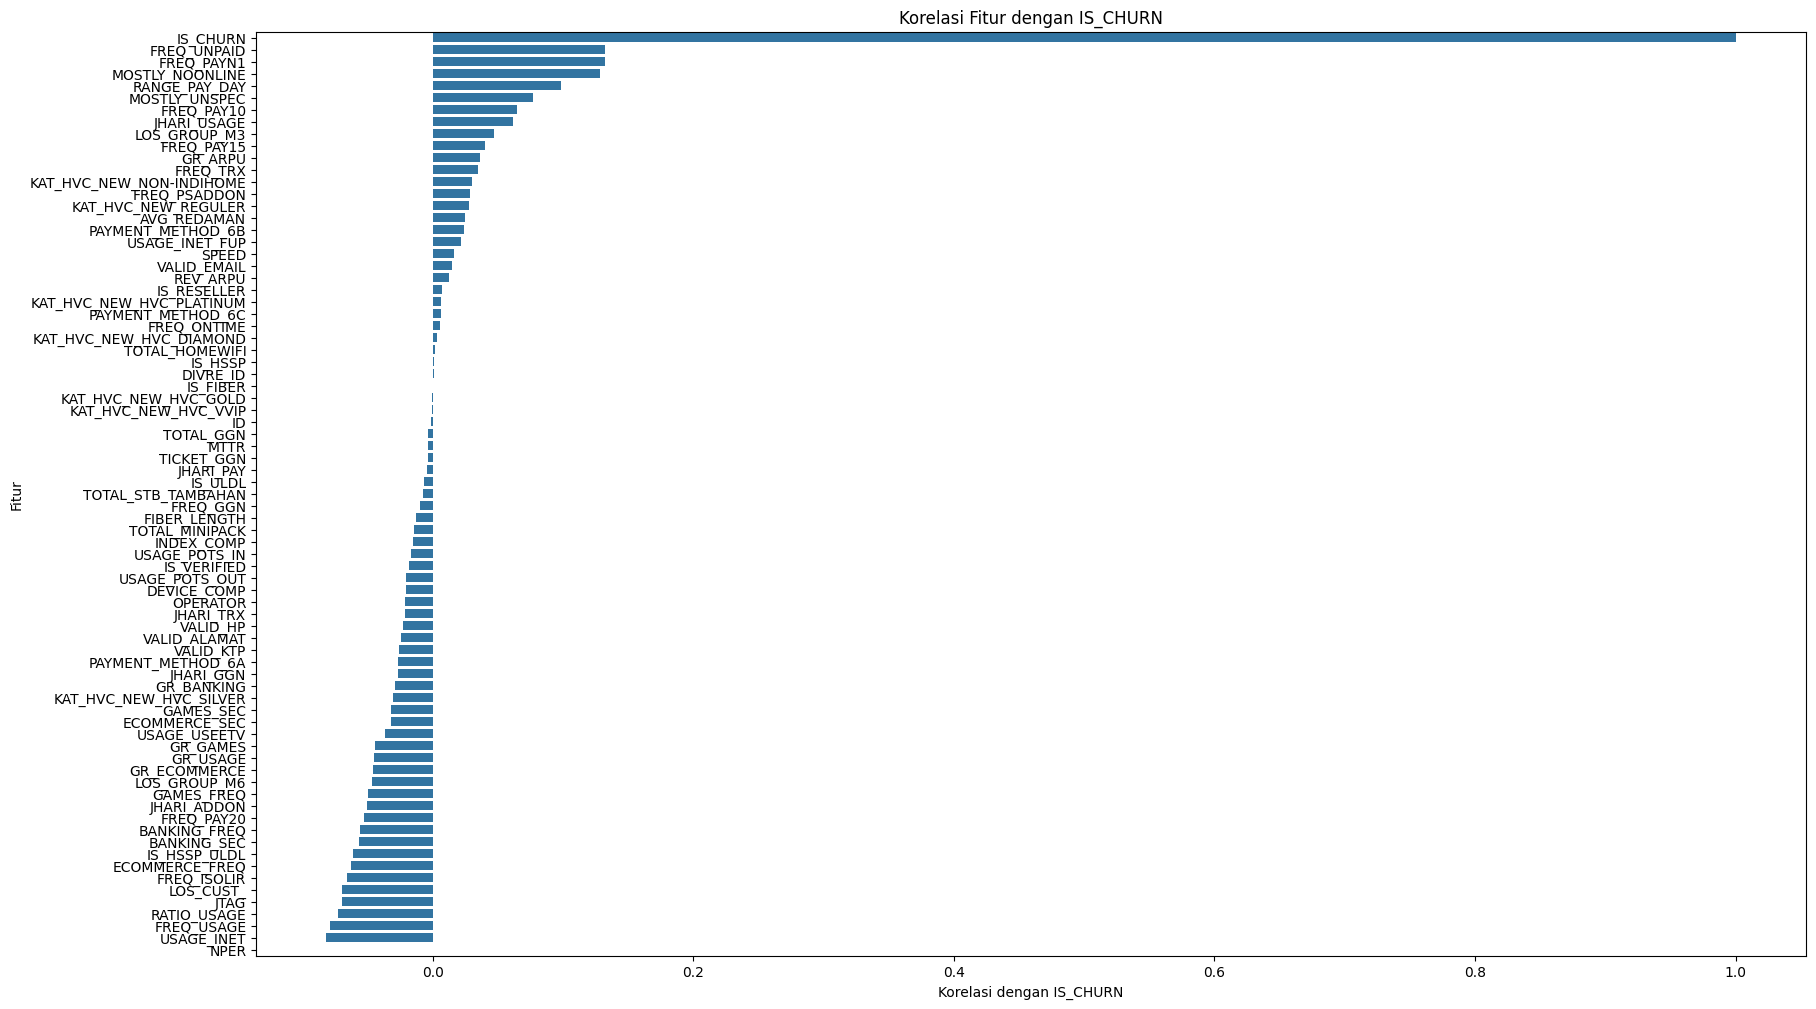

In [46]:
# Membuat bar plot
plt.figure(figsize=(20, 12))
sns.barplot(x='Korelasi dengan IS_CHURN', y='Fitur', data=df_corr)
plt.title('Korelasi Fitur dengan IS_CHURN')
plt.show()

RFE

In [47]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
rfe_df = pd.DataFrame({'Fitur': X.columns, 'Selected': fit.support_, 'Ranking': fit.ranking_})
rfe_df_sorted = rfe_df.sort_values(by='Ranking', ascending=False)
print(rfe_df_sorted)

c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

                       Fitur  Selected  Ranking
42            TOTAL_HOMEWIFI     False       67
73      KAT_HVC_NEW_HVC_VVIP     False       66
50               IS_RESELLER     False       65
52                   IS_HSSP     False       64
69   KAT_HVC_NEW_HVC_DIAMOND     False       63
7         TOTAL_STB_TAMBAHAN     False       62
74  KAT_HVC_NEW_NON-INDIHOME     False       61
71  KAT_HVC_NEW_HVC_PLATINUM     False       60
70      KAT_HVC_NEW_HVC_GOLD     False       59
24                TICKET_GGN     False       58
17                FREQ_PAY10     False       57
6             TOTAL_MINIPACK     False       56
18                FREQ_PAY15     False       55
67              LOS_GROUP_M3     False       54
22               FREQ_UNPAID     False       53
21                FREQ_PAYN1     False       52
51                   IS_ULDL     False       51
65         PAYMENT_METHOD_6B     False       50
57              FREQ_PSADDON     False       49
66         PAYMENT_METHOD_6C     False  

c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature Importance

In [48]:
model = RandomForestClassifier()
model.fit(X, y)
importance_df = pd.DataFrame({'Fitur': X.columns, 'Importance': model.feature_importances_})
importance_df_sorted = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df_sorted)

                       Fitur    Importance
9                 USAGE_INET  3.901300e-02
12                  GR_USAGE  3.862045e-02
29               AVG_REDAMAN  3.784242e-02
30              FIBER_LENGTH  3.772942e-02
1                         ID  3.728039e-02
11               RATIO_USAGE  3.678719e-02
60                 JHARI_GGN  3.507054e-02
10            USAGE_INET_FUP  3.410082e-02
56               JHARI_ADDON  3.361899e-02
3                       JTAG  3.331465e-02
2                  LOS_CUST_  3.310391e-02
54                 JHARI_TRX  3.194951e-02
58                 JHARI_PAY  3.156091e-02
36              GR_ECOMMERCE  3.111318e-02
39                  GR_GAMES  3.026462e-02
33                GR_BANKING  2.827793e-02
23             RANGE_PAY_DAY  2.773398e-02
16                  REV_ARPU  2.759612e-02
34            ECOMMERCE_FREQ  2.485359e-02
37                GAMES_FREQ  2.405800e-02
35             ECOMMERCE_SEC  2.385470e-02
38                 GAMES_SEC  2.327078e-02
32         

Information Gain

In [49]:
info_gain = mutual_info_classif(X, y)
info_gain_df = pd.DataFrame({'Fitur': X.columns, 'Information Gain': info_gain})
info_gain_df_sorted = info_gain_df.sort_values(by='Information Gain', ascending=False)
print(info_gain_df_sorted)

                       Fitur  Information Gain
68              LOS_GROUP_M6          0.229634
44                  VALID_HP          0.213390
5                   IS_FIBER          0.209311
47              VALID_ALAMAT          0.193072
0                       NPER          0.185975
43                 VALID_KTP          0.175259
46               IS_VERIFIED          0.168696
45               VALID_EMAIL          0.162990
53              IS_HSSP_ULDL          0.128000
75       KAT_HVC_NEW_REGULER          0.122854
63                FREQ_USAGE          0.120885
72    KAT_HVC_NEW_HVC_SILVER          0.111358
64         PAYMENT_METHOD_6A          0.109859
49                  OPERATOR          0.103755
62               JHARI_USAGE          0.081568
8                      SPEED          0.077160
58                 JHARI_PAY          0.053402
66         PAYMENT_METHOD_6C          0.053383
20               FREQ_ISOLIR          0.038884
59               FREQ_ONTIME          0.034629
65         PA

Gini Importance

In [50]:
model = RandomForestClassifier()
model.fit(X, y)
gini_importance = model.feature_importances_
gini_df = pd.DataFrame({'Fitur': X.columns, 'Gini Importance': gini_importance})
gini_df_sorted = gini_df.sort_values(by='Gini Importance', ascending=False)
print(gini_df_sorted)

                       Fitur  Gini Importance
9                 USAGE_INET         0.039216
12                  GR_USAGE         0.038765
29               AVG_REDAMAN         0.038171
30              FIBER_LENGTH         0.037580
1                         ID         0.037239
11               RATIO_USAGE         0.036823
60                 JHARI_GGN         0.035142
10            USAGE_INET_FUP         0.034004
56               JHARI_ADDON         0.033830
3                       JTAG         0.033426
2                  LOS_CUST_         0.033297
54                 JHARI_TRX         0.032073
58                 JHARI_PAY         0.031511
36              GR_ECOMMERCE         0.031206
39                  GR_GAMES         0.029820
23             RANGE_PAY_DAY         0.028062
33                GR_BANKING         0.028058
16                  REV_ARPU         0.027548
34            ECOMMERCE_FREQ         0.024755
37                GAMES_FREQ         0.024093
35             ECOMMERCE_SEC      

Coefficient Magnitude (dari model Linear)

In [51]:
model = LogisticRegression()
model.fit(X, y)
coef_importance = model.coef_[0]
coef_df = pd.DataFrame({'Fitur': X.columns, 'Coefficient Magnitude': coef_importance})
coef_df_sorted = coef_df.sort_values(by='Coefficient Magnitude', ascending=False)
print(coef_df_sorted)

                       Fitur  Coefficient Magnitude
29               AVG_REDAMAN           8.059613e-14
27           MOSTLY_NOONLINE           3.616207e-15
33                GR_BANKING           1.187740e-15
22               FREQ_UNPAID           2.301085e-21
21                FREQ_PAYN1           2.301085e-21
71  KAT_HVC_NEW_HVC_PLATINUM           4.425149e-23
74  KAT_HVC_NEW_NON-INDIHOME           3.993325e-23
69   KAT_HVC_NEW_HVC_DIAMOND           1.388524e-23
52                   IS_HSSP           1.290601e-24
50               IS_RESELLER           4.675753e-25
42            TOTAL_HOMEWIFI           9.098622e-26
73      KAT_HVC_NEW_HVC_VVIP          -9.743164e-26
7         TOTAL_STB_TAMBAHAN          -2.239835e-23
70      KAT_HVC_NEW_HVC_GOLD          -5.947315e-23
24                TICKET_GGN          -3.832529e-22
17                FREQ_PAY10          -5.595606e-22
6             TOTAL_MINIPACK          -1.244885e-21
18                FREQ_PAY15          -1.706151e-21
67          

c:\Users\mmush\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Gradient Boosting

In [52]:
model = GradientBoostingClassifier()
model.fit(X, y)
gb_importance = model.feature_importances_
gb_df = pd.DataFrame({'Fitur': X.columns, 'Gradient Boosting Importance': gb_importance})
gb_df_sorted = gb_df.sort_values(by='Gradient Boosting Importance', ascending=False)
print(gb_df_sorted)

                       Fitur  Gradient Boosting Importance
58                 JHARI_PAY                      0.153697
27           MOSTLY_NOONLINE                      0.152847
21                FREQ_PAYN1                      0.097976
9                 USAGE_INET                      0.061862
22               FREQ_UNPAID                      0.060828
23             RANGE_PAY_DAY                      0.059727
16                  REV_ARPU                      0.040095
20               FREQ_ISOLIR                      0.038130
36              GR_ECOMMERCE                      0.037959
12                  GR_USAGE                      0.033623
2                  LOS_CUST_                      0.025633
48                   GR_ARPU                      0.023132
19                FREQ_PAY20                      0.019528
62               JHARI_USAGE                      0.017952
39                  GR_GAMES                      0.017693
55                  FREQ_TRX                      0.0129

Weighted Correlation

In [53]:
# weights = np.random.rand(len(new_churn_encoded))  # Contoh bobot acak
# weighted_corr = new_churn_encoded.apply(lambda x: np.corrcoef(x, new_churn_encoded['IS_CHURN'], w=weights)[0, 1])
# df_weighted_corr = pd.DataFrame({'Fitur': weighted_corr.index, 'Weighted Correlation': weighted_corr.values}).sort_values(by='Weighted Correlation', ascending=False)

# Contoh bobot acak
weights = np.random.rand(len(new_churn_encoded))

# Fungsi untuk menghitung korelasi berbobot
def weighted_corr(x, y, w):
    w_mean_x = np.average(x, weights=w)
    w_mean_y = np.average(y, weights=w)
    cov_xy = np.sum(w * (x - w_mean_x) * (y - w_mean_y)) / np.sum(w)
    std_x = np.sqrt(np.sum(w * (x - w_mean_x)**2) / np.sum(w))
    std_y = np.sqrt(np.sum(w * (y - w_mean_y)**2) / np.sum(w))
    return cov_xy / (std_x * std_y)

# Menghitung korelasi berbobot untuk setiap fitur
weighted_corrs = new_churn_encoded.apply(lambda x: weighted_corr(x, new_churn_encoded['IS_CHURN'], weights))

# Membuat DataFrame untuk menampilkan hasil
df_weighted_corr = pd.DataFrame({'Fitur': weighted_corrs.index, 'Weighted Correlation': weighted_corrs.values}).sort_values(by='Weighted Correlation', ascending=False)
print(df_weighted_corr)

                       Fitur  Weighted Correlation
64                  IS_CHURN          1.000000e+00
22               FREQ_UNPAID          1.310217e-01
21                FREQ_PAYN1          1.310217e-01
23             RANGE_PAY_DAY          1.251887e-01
27           MOSTLY_NOONLINE          6.949351e-02
17                FREQ_PAY10          6.874380e-02
62               JHARI_USAGE          5.420440e-02
55                  FREQ_TRX          4.803612e-02
68              LOS_GROUP_M3          4.720763e-02
48                   GR_ARPU          4.567861e-02
18                FREQ_PAY15          3.932758e-02
75  KAT_HVC_NEW_NON-INDIHOME          3.081293e-02
76       KAT_HVC_NEW_REGULER          2.791010e-02
66         PAYMENT_METHOD_6B          2.439475e-02
57              FREQ_PSADDON          2.322772e-02
10            USAGE_INET_FUP          2.130629e-02
45               VALID_EMAIL          1.430941e-02
16                  REV_ARPU          1.263797e-02
8                      SPEED   

RidgeCV

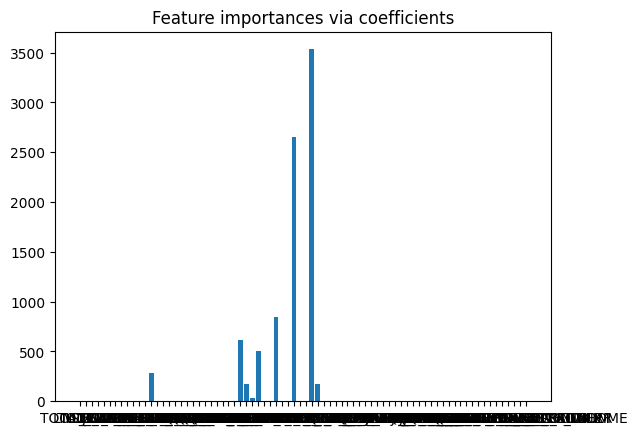

In [54]:
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [55]:
threshold = np.sort(importance)[-23] + 0.01

tic = time()
sfm = SelectFromModel(ridge, threshold=threshold).fit(X, y)
toc = time()
selected_features = feature_names[sfm.get_support()]
print(f"Features selected by SelectFromModel: {selected_features}")
print(f"Done in {toc - tic:.3f}s")

Features selected by SelectFromModel: ['LOS_CUST_' 'JTAG' 'TOTAL_STB_TAMBAHAN' 'GR_USAGE' 'MOSTLY_NOONLINE'
 'MOSTLY_UNSPEC' 'AVG_REDAMAN' 'FIBER_LENGTH' 'GR_BANKING' 'GR_ECOMMERCE'
 'GR_GAMES' 'INDEX_COMP' 'VALID_HP' 'IS_VERIFIED' 'VALID_ALAMAT' 'IS_HSSP'
 'KAT_HVC_NEW_HVC_GOLD' 'KAT_HVC_NEW_HVC_SILVER'
 'KAT_HVC_NEW_NON-INDIHOME' 'KAT_HVC_NEW_REGULER']
Done in 8.358s


In [56]:
X_new = X[selected_features]
print(f"Shape of the new dataset: {X_new.shape}")

Shape of the new dataset: (1048575, 20)


### Data Balancing

In [57]:
# # Hitung jumlah churn dan non-churn
# new_churn['IS_CHURN'].value_counts()

In [58]:
# X = new_churn.drop(['IS_CHURN', 'LOS_GROUP', 'PAYMENT_METHOD', 'KAT_HVC_NEW'], axis=1)
# y = new_churn['IS_CHURN']

In [59]:
smote = SMOTEENN()
X_resampled, y_resampled = smote.fit_resample(X_new, y)

print("The new data contains {} rows".format(X_resampled.shape[0]))

KeyboardInterrupt: 

In [59]:
y_resampled.value_counts()

IS_CHURN
1.0    849790
0.0    643677
Name: count, dtype: int64

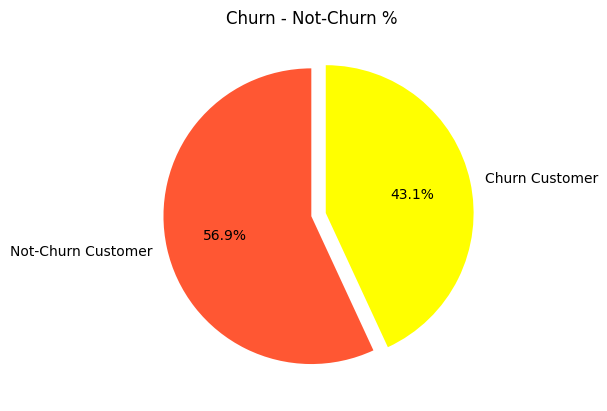

In [60]:
# Hitung distribusi dari nilai y_resampled
y_counts = y_resampled.value_counts()

# Buat pie chart berdasarkan distribusi y_resampled
plt.pie(
    y_counts, 
    labels=['Not-Churn Customer', 'Churn Customer'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['#FF5733', 'yellow'], 
    explode=(0, 0.1)
)

# Tambahkan judul
plt.title('Churn - Not-Churn %')

# Tampilkan plot
plt.show()

### Data Splitting

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30)

In [62]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1045426, 20), (448041, 20), (1045426,), (448041,))

### Data Scaling

In [63]:
X_resampled.describe()

,LOS_CUST_,JTAG,TOTAL_STB_TAMBAHAN,GR_USAGE,MOSTLY_NOONLINE,MOSTLY_UNSPEC,AVG_REDAMAN,FIBER_LENGTH,GR_BANKING,GR_ECOMMERCE,GR_GAMES,INDEX_COMP,VALID_HP,IS_VERIFIED,VALID_ALAMAT,IS_HSSP
count,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06,1.493467e+06
mean,2.676148e+10,2.510044e+10,2.599925e-03,-6.076226e+12,2.809082e+12,1.660862e+12,-1.554061e+13,2.322782e+13,-1.035510e+13,-4.302766e+12,-2.378184e+12,5.893507e+12,9.986923e-01,9.979833e-01,9.988746e-01,1.129520e-04
std,2.701228e+10,2.152671e+10,2.696047e-02,4.466147e+13,1.861239e+13,1.546767e+13,7.363377e+12,2.841981e+13,4.169527e+13,4.095502e+13,4.168313e+13,1.626027e+13,1.456436e-02,1.996368e-02,1.304253e-02,3.149109e-03
min,2.000000e+00,2.000000e+00,0.000000e+00,-1.000000e+14,0.000000e+00,0.000000e+00,-3.560895e+13,-9.900000e+01,-1.000000e+14,-9.999984e+13,-9.999960e+13,0.000000e+00,8.068612e-01,7.642502e-01,8.199047e-01,0.000000e+00
25%,8.520796e+09,8.451613e+09,0.000000e+00,-3.390019e+13,0.000000e+00,0.000000e+00,-2.016474e+13,5.896980e+03,-3.826654e+13,-2.887580e+13,-2.607817e+13,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.119000e+10,2.105009e+10,0.000000e+00,-2.169380e+12,0.000000e+00,0.000000e+00,-1.817232e+13,1.066168e+13,-1.000000e+00,-6.307579e-02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,3.422581e+10,3.392806e+10,0.000000e+00,2.224203e+13,0.000000e+00,0.000000e+00,-1.537294e+13,4.353973e+13,6.348198e+12,1.642874e+13,1.894518e+13,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.648649e+11,1.074243e+11,3.253787e-01,9.999865e+13,1.280850e+14,1.498614e+14,-1.400000e+01,9.999895e+13,9.999692e+13,9.999933e+13,9.999969e+13,6.349932e+13,1.000000e+00,1.000000e+00,1.000000e+00,9.834494e-02


In [59]:
# Pilih hanya kolom numerik
numeric_cols = X_train.select_dtypes(include=['number']).columns

# Buat objek StandardScaler
scaler = StandardScaler()

# Fit dan transform data training
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Transform data testing
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train[numeric_cols].head()

,NPER,ID,LOS_CUST_,JTAG,DIVRE_ID,IS_FIBER,TOTAL_MINIPACK,TOTAL_STB_TAMBAHAN,SPEED,USAGE_INET,...,JHARI_TRX,FREQ_TRX,JHARI_ADDON,FREQ_PSADDON,JHARI_PAY,FREQ_ONTIME,JHARI_GGN,FREQ_GGN,JHARI_USAGE,FREQ_USAGE
542801,0.0,1.667680,-0.095656,-0.043379,0.166215,0.0,2.537153,-0.09658,-0.986996,-0.147787,...,-1.289558,2.613808,-0.197531,3.585170,-0.015296,-0.196912,-1.293804,3.863209,-0.341632,0.704049
760146,0.0,-1.071725,-0.964853,-1.133971,1.045816,0.0,-0.361106,-0.09658,0.017783,0.614487,...,-0.238413,1.327255,-0.121584,-0.403894,-0.023190,0.890069,-1.164721,0.948877,-0.341632,0.704049
1029387,0.0,-0.843579,-0.653539,-0.743362,1.262365,0.0,-0.361106,-0.09658,1.730136,1.811741,...,-0.280691,0.487002,3.487979,-0.403894,-8.289669,0.021204,2.318701,-0.508289,-0.233907,-0.443963
1219833,0.0,1.607719,1.283731,1.687354,1.344643,0.0,-0.361106,-0.09658,-0.513959,-0.500544,...,0.059240,-0.557777,0.954517,-0.403894,-0.035535,-0.687312,-0.723415,-0.195011,-0.297948,0.471282
795690,0.0,-1.122329,-0.950060,-1.115411,-0.081122,0.0,-0.361106,-0.09658,0.113133,0.142413,...,-0.350907,0.436235,3.255369,-0.403894,-0.045086,-0.812847,0.347572,0.210064,-0.341632,0.704049


In [64]:
# Hitung rata-rata dan standar deviasi dari data training
mean = X_train.mean()
std = X_train.std()

# Hitung Z-score untuk data training
X_train = (X_train - mean) / std

# Hitung Z-score untuk data testing menggunakan mean dan std dari data training
X_test = (X_test - mean) / std

# Menampilkan beberapa baris pertama dari data training yang telah di-scaling
print(X_train.head())

        LOS_CUST_      JTAG  TOTAL_STB_TAMBAHAN  GR_USAGE  MOSTLY_NOONLINE  \
154668  -0.991333 -1.166843           -0.096552 -0.138588        -0.151101   
258562   0.551951  0.770320           -0.096552 -0.208748        -0.151101   
235443  -0.149216 -0.109800           -0.096552  0.592095        -0.151101   
56608    0.221076  0.354999           -0.096552  1.850108        -0.151101   
434408  -0.034545  0.034138           -0.096552 -1.122138        -0.151101   

        MOSTLY_UNSPEC  AVG_REDAMAN  FIBER_LENGTH  GR_BANKING  GR_ECOMMERCE  \
154668      -0.107512    -0.410935     -0.047939    0.247857      0.104546   
258562      -0.107512    -1.182857     -0.045309    0.503257      0.775237   
235443      -0.107512    -0.436373     -0.395445    0.988932     -1.449994   
56608       -0.107512     2.109571     -0.817396   -1.168435     -0.755420   
434408      -0.107512    -0.475029      1.684770    0.247857      0.104546   

        GR_GAMES  INDEX_COMP  VALID_HP  IS_VERIFIED  VALID_ALA

## **3. EDA**

### Summary Statistics

### Analisis Univariate & Multivariate

## **4. Build Model**

### Decision Tree

In [65]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.84      0.80      0.82    193074
         1.0       0.86      0.89      0.87    254967

    accuracy                           0.85    448041
   macro avg       0.85      0.85      0.85    448041
weighted avg       0.85      0.85      0.85    448041



### Random Forest

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90    193074
         1.0       0.95      0.89      0.92    254967

    accuracy                           0.91    448041
   macro avg       0.91      0.91      0.91    448041
weighted avg       0.91      0.91      0.91    448041



### Logistic Regression

In [67]:
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.65      0.81      0.72    193074
         1.0       0.82      0.66      0.73    254967

    accuracy                           0.73    448041
   macro avg       0.73      0.74      0.73    448041
weighted avg       0.75      0.73      0.73    448041



### Ridge Classifier

In [68]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('Classification report for Ridge Classifier:\n', metrics.classification_report(y_test, y_pred_ridge))

Classification report for Ridge Classifier:
               precision    recall  f1-score   support

         0.0       0.64      0.84      0.73    193074
         1.0       0.84      0.64      0.73    254967

    accuracy                           0.73    448041
   macro avg       0.74      0.74      0.73    448041
weighted avg       0.76      0.73      0.73    448041



### XG Boost

In [69]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('Classification report for XGBoost:\n', metrics.classification_report(y_test, y_pred_xgb))

Classification report for XGBoost:
               precision    recall  f1-score   support

         0.0       0.74      0.87      0.80    193074
         1.0       0.89      0.77      0.82    254967

    accuracy                           0.81    448041
   macro avg       0.81      0.82      0.81    448041
weighted avg       0.82      0.81      0.81    448041



### Cat Boost

In [70]:
catboost = CatBoostClassifier(verbose=0)  # verbose=0 untuk menonaktifkan output selama pelatihan
catboost.fit(X_train, y_train)
y_pred_catboost = catboost.predict(X_test)
print('Classification report for CatBoost:\n', metrics.classification_report(y_test, y_pred_catboost))

Classification report for CatBoost:
               precision    recall  f1-score   support

         0.0       0.75      0.88      0.81    193074
         1.0       0.90      0.78      0.84    254967

    accuracy                           0.82    448041
   macro avg       0.82      0.83      0.82    448041
weighted avg       0.83      0.82      0.83    448041



### Light GBM

In [71]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
print('Classification report for LightGBM:\n', metrics.classification_report(y_test, y_pred_lgbm))

[LightGBM] [Info] Number of positive: 594823, number of negative: 450603
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3147
[LightGBM] [Info] Number of data points in the train set: 1045426, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568977 -> initscore=0.277677
[LightGBM] [Info] Start training from score 0.277677
Classification report for LightGBM:
               precision    recall  f1-score   support

         0.0       0.75      0.91      0.82    193074
         1.0       0.92      0.77      0.84    254967

    accuracy                           0.83    448041
   macro avg       0.83      0.84      0.83    448041
weighted avg       0.84      0.83      0.83    448041



### KNN

In [72]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.81      0.86    193074
         1.0       0.87      0.95      0.91    254967

    accuracy                           0.89    448041
   macro avg       0.90      0.88      0.88    448041
weighted avg       0.89      0.89      0.89    448041

